In [32]:
%matplotlib notebook 
import numpy as np
import wget
import pandas as pd
from tqdm import tqdm 
import matplotlib.pyplot as plt
from celluloid import Camera
import matplotlib.animation as anim
import scipy as sp
from scipy import integrate
from sympy.abc import x,y,z,a,b,c,d
import sympy as sp

 a) K es cuna constante de proporcionalidad que relaciona qué tanto se deforma un cierto material con respecto a la fuerza por volumen que se le ejerce.
b) Sí es conservativa debido a que no posee disipadores, es decir, a la hora de calcular el trabajo que haga sobre un camino cerrado este será nulo. Puede verse facilmente mediante integrate.



100%|██████████| 100001/100001 [00:12<00:00, 7853.51it/s]


<IPython.core.display.Javascript object>


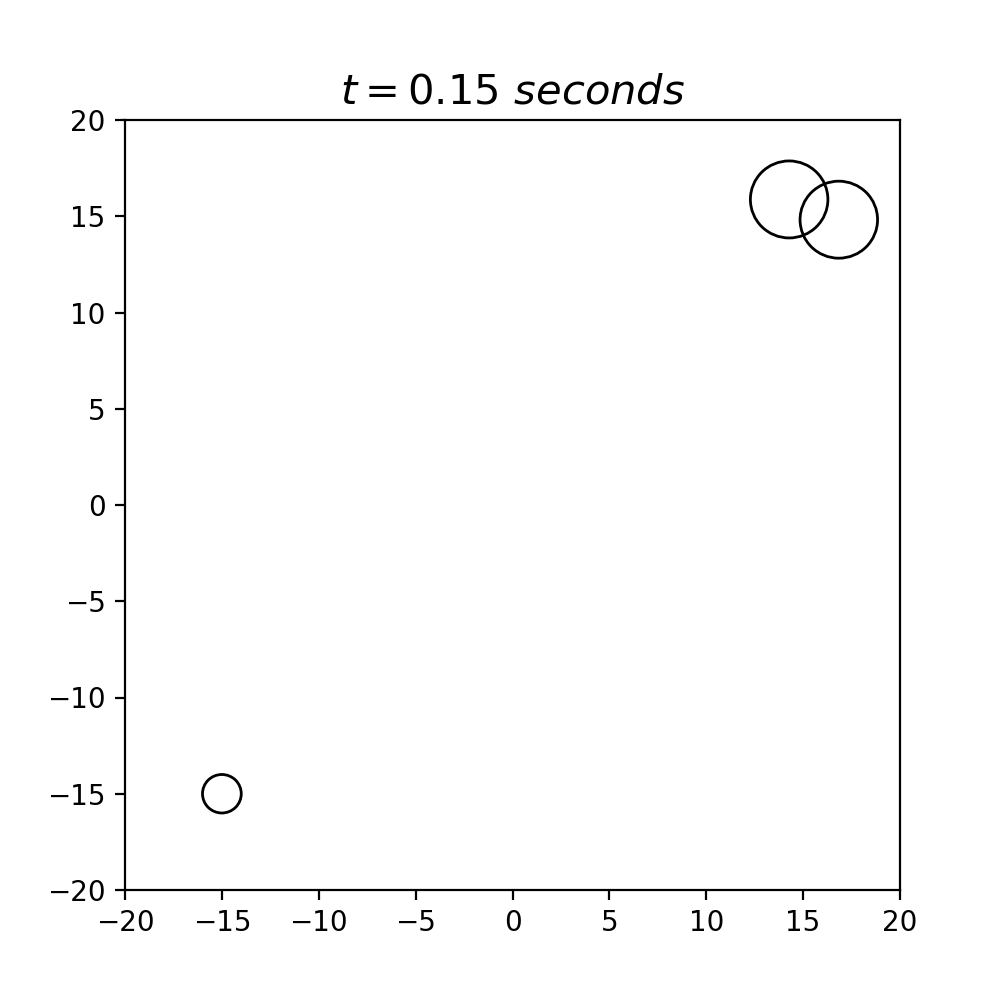

In [35]:
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt  = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
    # Method
    def ParticleForce(self, positions, radius):
        Forces=[]
        for i in range (len(radius)):
            F=0
            a0=(self.r[0] - positions[i][0])
            a1=(self.r[1] - positions[i][1])
            a=np.sqrt(a0**2+a1**2)
            b=(self.radius + radius[i])
            if a < b:
                F=100*a**3
            Forces.append(F)
                 
        return Forces
    
    def PotentialEnergy(self, positions, radius):
        Us=[]
        x = sp.Symbol('x')
        for i in range(len(radius)):
            a0=(self.r[0] - positions[i][0])
            a1=(self.r[1] - positions[i][1])
            a=np.sqrt(a0**2+a1**2)
            rfinal=a
            f=x*100*a**3
            U1=sp.integrate(f, (x,0,rfinal))
            Us.append(U1)
        return Us
    def KineticEnergy(self):
        return (1/2)*self.m*(self.v)**2
 
    def Evolution(self,i, positions, radius):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
       # print(self.r)
        
        #Fuerzas interactuantes
        Forces=self.ParticleForce(positions, radius)
        for i in range(len(particles)):
            self.a+=(Forces[i])/1 #suponemos que las esferas pesan 1KG        
        
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
        self.a[0]=0
        self.a[1]=0        
        Forces=np.zeros((len(Forces),2))
                                            
    def CheckWallLimits(self,limits,dim=2):
        
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = - self.v[i]
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = - self.v[i]
                
    def RestoreForce(self):
        self.Force[:]=0.
        self.a[:]=0.
        self.Ep[:]=0.
        self.Niter[:]=0.
    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    def SetMomentum(self, i, p):
        self.MomentumVector[i]=p
    
    def SetEp(self,i,Ep):
        self.EpVector[i]=Ep
        
    def SetEk(self,i,Ek):
        self.EpVector[i]=Ek
    
    def GetForce(self,p):
        d=np.linalg.norm(self.r-p.GetPosition())
        impact=self.radius + p.GetR()-d
        if impact >0:
            Fn=self.K*compression**3/d
            self.Force=np.add(self.Force, Fn*(self.r-p.GetPosition()))
            self.Ep += self.K*compression**4/4.
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    

    def GetVelocityVector(self):
        return self.vVector
    
    def GetR(self):
        return self.radius
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
               # print(self.RrVector)
            
dt = 0.0001
tmax = 10
t = np.arange(0,tmax+dt,dt)

Limits = np.array([20.,20.])

B1=Particle(np.array([1.,2.]),np.array([20.,0.]),np.array([0.,0.]),t,1.,2.,1)
B2=Particle(np.array([0.,-1.6]),np.array([0.,0.]),np.array([0.,0.]),t,1.,2.,2)
B3=Particle(np.array([-15.,-15.]),np.array([0.,0.]),np.array([0.,0.]),t,1.,1.,3)
particles=np.array([B1,B2,B3])
Positions=np.array([B1.r, B2.r, B3.r])
Radius=np.array([2.,2.,1.])
def RunSimulation(t, Particles, positions, radius, Velo = 6):
    
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            
            Particles[i].CheckWallLimits(Limits)
            Particles[i].Evolution(it, positions, radius)
        
        
    return Particles

Particles=RunSimulation(t,particles, Positions, Radius, Velo=50)
US=B1.PotentialEnergy(Positions, Radius)

def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

redt = ReduceTime(t,10)
def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        
        vx = p.GetVelocityVector()[i,0]
        vy = p.GetVelocityVector()[i,1]
        
        circle = plt.Circle( (x,y), p.GetR(), color='k', fill=False)
        plot = ax.add_patch(circle)
        #plot = ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

In [ ]:
#0.2

In [18]:
#Punto a

file='Desktop/EnergiaPotencial.txt'
url="https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EnergiaPotencialGas2D.txt"
Path_ =np.loadtxt(url)

Path_[:,1]


array([424.88697365, 424.17895817, 422.15355189, ...,   0.        ,
         0.        ,   0.        ])

In [23]:
media=np.mean(Path_[:,1])
energia=Path_[:,1]-media
tiempo=Path_[:,0]

In [20]:
#Punto c
N=len(energia)
fft=np.fft.fft(energia)
frecuencias=np.fft.fftfreq(N,1)
ffta=np.abs(fft)

mask=frecuencias <0
FFT=fft.copy()
FFT[mask]=0.
FFTA=np.abs(FFT)
a=np.argmax(FFTA)
f0=frecuencias[a]
T=(1/f0)/12
print(T)



66.66666666666667


In [21]:
#Punto d

a_A=np.abs(frecuencias) > f0
a_B=np.abs(frecuencias) < f0
fft[a_A | a_B]=0
ffta=np.abs(fft)

In [22]:
energia_fft=np.fft.ifft(fft)

<IPython.core.display.Javascript object>


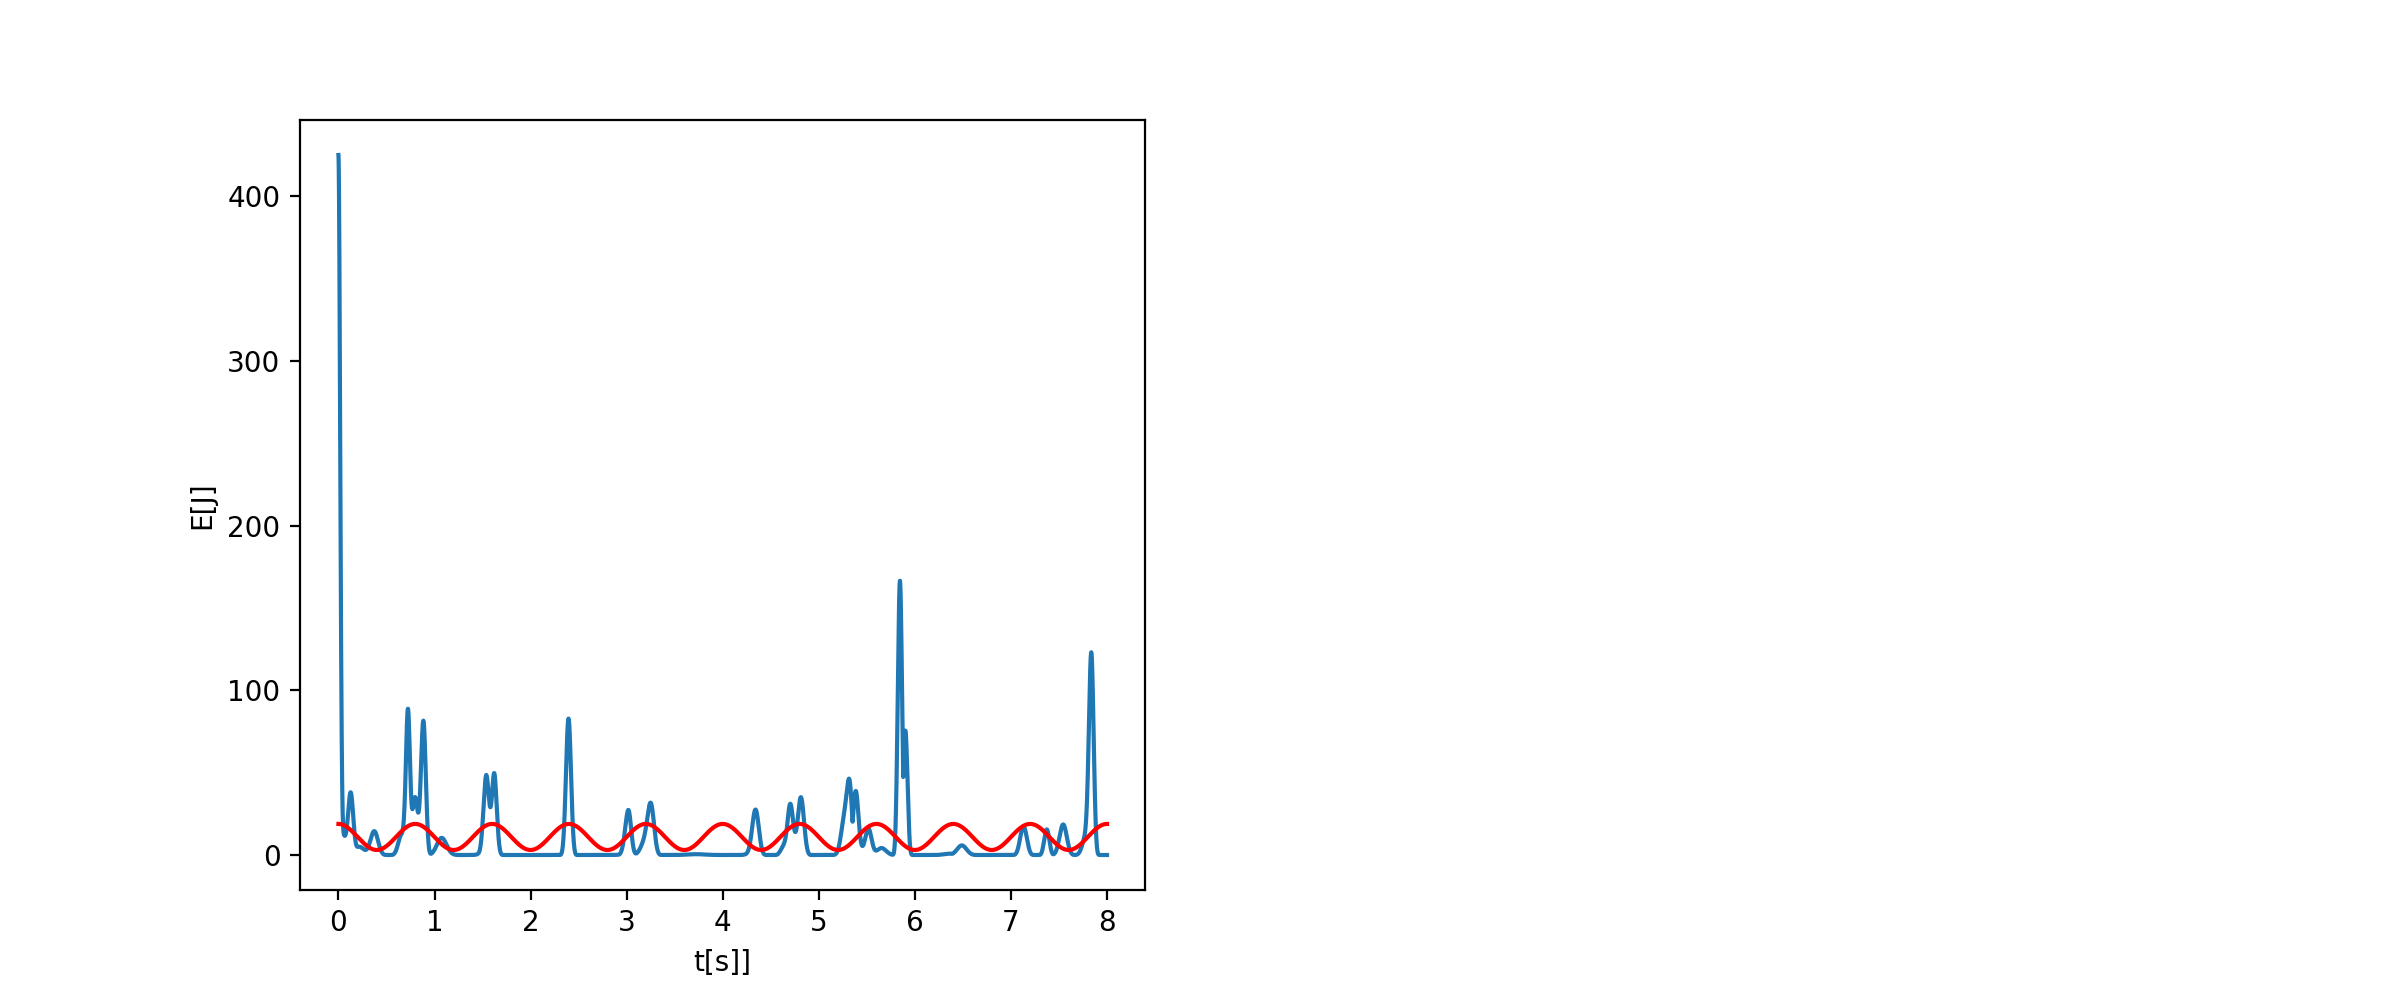

In [26]:
fig=plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xlabel(r't[s]]')
plt.ylabel(r'E[J]')
plt.plot(tiempo, energia+media, label=r'Serie original')
plt.plot(tiempo, np.real(energia_fft)+media, c='r', label='Fundamental')